# DownloadData

Retrieve the temperature for the locations in **locations.csv**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap, cm
import pyowm
import time
import datetime

def owm_query(id_list, temp, it = 0):
    try:
        it = it + 1
        result = owm.weather_at_ids(id_list)
        temp.append(result)
    except:
        print("it = %i" % it)
        if it < 10:
            time.sleep(1)
            owm_query(id_list, temp, it)
        else:
            print("Query failed")

#Retrieve api-key
with open('api-key/owm-api-key.txt', 'r') as key_file:
    key = key_file.read()

owm = pyowm.OWM(key)

In [2]:
#Read cities list
locations = pd.read_csv("data/current-version/locations.csv", ',')
locations = locations.drop(['Unnamed: 0'], axis=1)

In [3]:
observation_list = []
id20s = []
elt_id20 = []
c = 0

#Regroup IDs in lists of 20, maximum observation number per query
for c in range(0, len(locations['ID'])):
    elt_id20.append(int(locations['ID'][c]))
    if len(elt_id20) == 20 or c == len(locations['ID'])-1:
        id20s.append(elt_id20)
        elt_id20 = []
    c = c + 1

In [4]:
#OWM queries to get observations
for id20 in id20s:
    temp = []
    owm_query(id20, temp)
    if temp == []:
        print("Warning: Missing data due to failed queries")
    else:
        observation_list.append(temp[0])
    time.sleep(1)

In [5]:
#Get weather and temperature for each city
weathers = []
temps = []

for obss in observation_list:
    for obs in obss:
        weathers.append(obs.get_weather())
        
for weather in weathers:
    temps.append(weather.get_temperature(unit='celsius'))
    
dfrows = []
for c in range(0, locations.shape[0]):
    dfrows.append(temps[c]['temp'])

In [6]:
df = pd.DataFrame({ 'City' : locations['City'].tolist(),
                   'ID' : locations['ID'].tolist(), 
                   'Lat' : locations['Lat'].tolist(), 
                   'Lon' : locations['Lon'].tolist(), 
                   'Temp' : dfrows })

In [7]:
x = datetime.datetime.now()
df.to_csv('data/current-version/Temp-%d_%d_%d-%d_%d.csv' % (x.year, x.month, x.day, x.hour, x.minute))

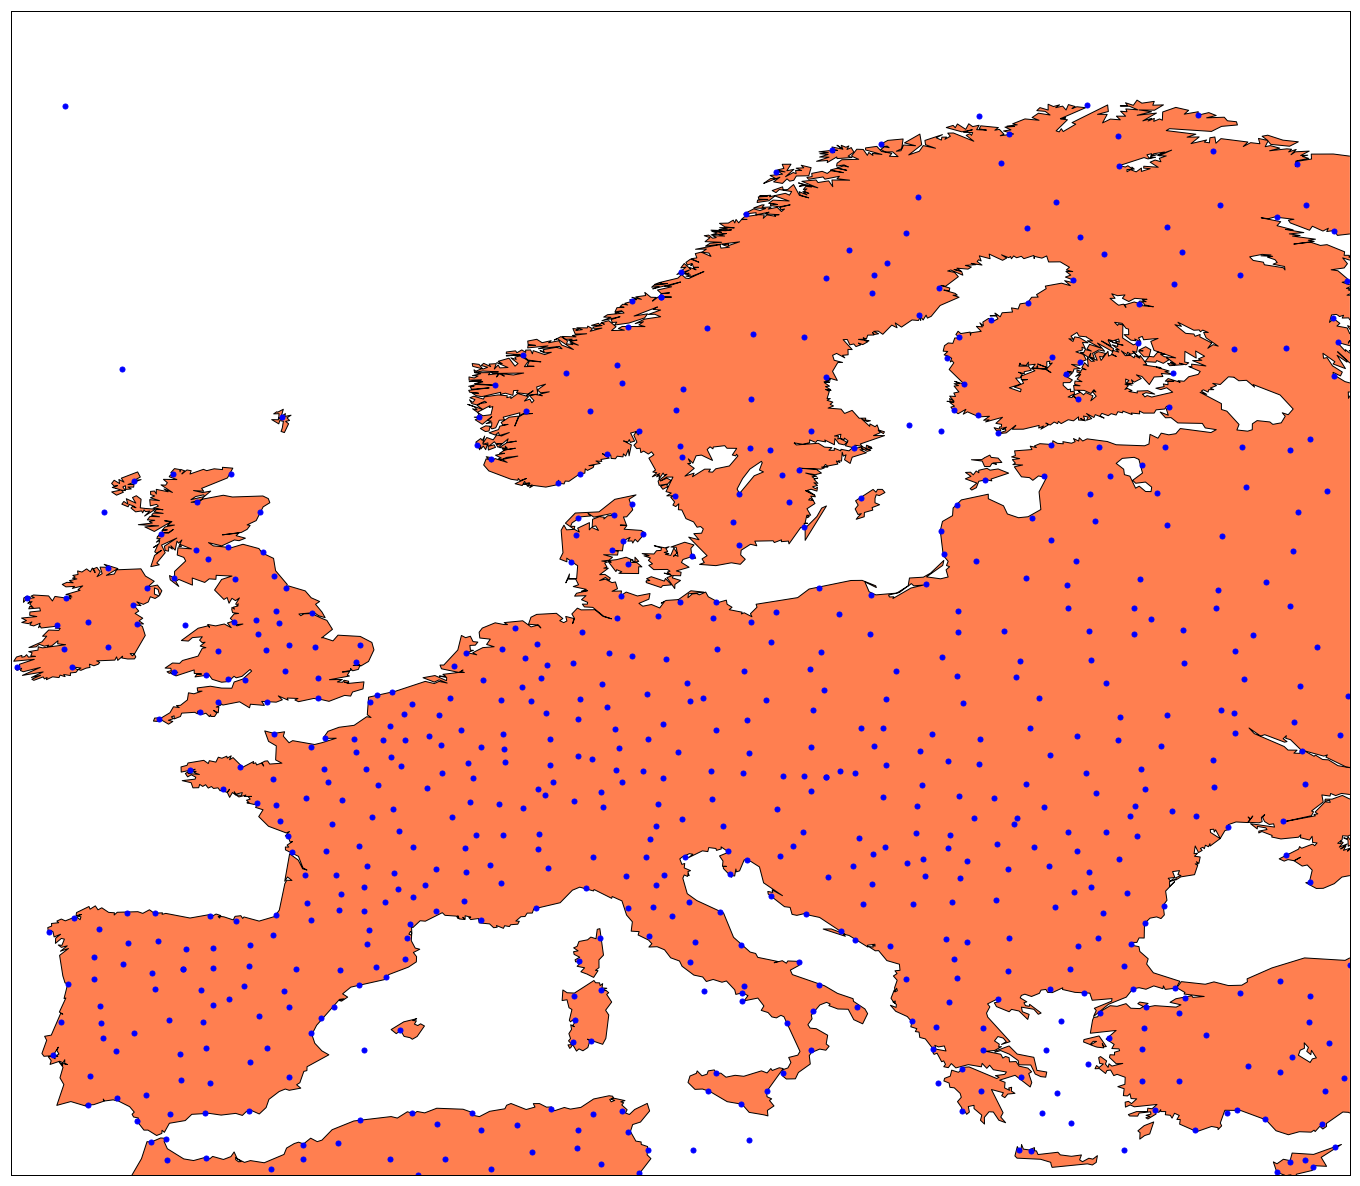

In [8]:
#Plot the cities on a map
plt.figure(figsize=(24,24))
map = Basemap(llcrnrlon=-10.56,llcrnrlat=34.65,urcrnrlon=34.88,urcrnrlat=74.17, resolution = 'l', epsg=4668)
map.drawmapboundary(fill_color='white')
map.fillcontinents(color='coral',lake_color='white')
map.drawcoastlines()
x, y = map(df['Lon'], df['Lat'])
map.plot(x, y, 'bo', markersize=5)

In [9]:
observation_list

[[<pyowm.webapi25.observation.Observation - reception time=2018-12-23 16:51:02+00>,
  <pyowm.webapi25.observation.Observation - reception time=2018-12-23 16:51:02+00>,
  <pyowm.webapi25.observation.Observation - reception time=2018-12-23 16:51:02+00>,
  <pyowm.webapi25.observation.Observation - reception time=2018-12-23 16:51:02+00>,
  <pyowm.webapi25.observation.Observation - reception time=2018-12-23 16:51:02+00>,
  <pyowm.webapi25.observation.Observation - reception time=2018-12-23 16:51:02+00>,
  <pyowm.webapi25.observation.Observation - reception time=2018-12-23 16:51:02+00>,
  <pyowm.webapi25.observation.Observation - reception time=2018-12-23 16:51:02+00>,
  <pyowm.webapi25.observation.Observation - reception time=2018-12-23 16:51:02+00>,
  <pyowm.webapi25.observation.Observation - reception time=2018-12-23 16:51:02+00>,
  <pyowm.webapi25.observation.Observation - reception time=2018-12-23 16:51:02+00>,
  <pyowm.webapi25.observation.Observation - reception time=2018-12-23 16:51: